In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [4]:
class BlogState(TypedDict):
    title:str
    outline:str
    content:str

In [6]:
def create_outline(state:BlogState)->BlogState:
    # fetch title 
    title =  state["title"]
    
      # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state 
    state["outline"] = outline
    return state

In [7]:
def create_blog(state:BlogState)->BlogState:
    title = state["title"]
    outline = state["outline"]

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state["content"] = content
    
    return state

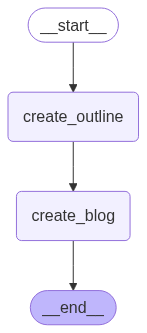

In [11]:
graph = StateGraph(BlogState)

# nodes
graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)

# edges 

graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","create_blog")
graph.add_edge("create_blog",END)

workflow = graph.compile()

workflow


In [13]:
intial_state = {'title': 'Rise of AI in World'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in World', 'outline': '## Blog Outline: The Rise of AI in the World\n\n**I. Introduction: The AI Revolution is Here**\n\n   *   **A. Hook:** Start with a captivating statistic, anecdote, or question about AI\'s impact on daily life (e.g., "Did you know that AI is predicted to contribute $15.7 trillion to the global economy by 2030?").\n   *   **B. Define Artificial Intelligence (AI):**\n        *   Provide a clear and concise definition of AI, avoiding overly technical jargon.\n        *   Highlight the key characteristics: learning, problem-solving, perception, and decision-making.\n   *   **C. Brief History of AI:**\n        *   Mention key milestones (e.g., Turing Test, early expert systems).\n        *   Explain the periods of "AI winters" and subsequent revivals.\n   *   **D. Thesis Statement:** Clearly state the blog\'s central argument.  For example: "AI is rapidly transforming various sectors of the world, presenting both unprecedented opportunities and si

In [14]:
print(final_state['outline'])

## Blog Outline: The Rise of AI in the World

**I. Introduction: The AI Revolution is Here**

   *   **A. Hook:** Start with a captivating statistic, anecdote, or question about AI's impact on daily life (e.g., "Did you know that AI is predicted to contribute $15.7 trillion to the global economy by 2030?").
   *   **B. Define Artificial Intelligence (AI):**
        *   Provide a clear and concise definition of AI, avoiding overly technical jargon.
        *   Highlight the key characteristics: learning, problem-solving, perception, and decision-making.
   *   **C. Brief History of AI:**
        *   Mention key milestones (e.g., Turing Test, early expert systems).
        *   Explain the periods of "AI winters" and subsequent revivals.
   *   **D. Thesis Statement:** Clearly state the blog's central argument.  For example: "AI is rapidly transforming various sectors of the world, presenting both unprecedented opportunities and significant challenges that require careful consideration an

In [15]:
print(final_state['content'])

## The Rise of AI in the World: A Transformative Force Shaping Our Future

**I. Introduction: The AI Revolution is Here**

**A. Hook:** Did you know that AI is predicted to contribute a staggering $15.7 trillion to the global economy by 2030? That's more than the current GDP of India and Japan combined! This figure underscores the profound and pervasive impact artificial intelligence is already having, and will continue to have, on our world.

**B. Define Artificial Intelligence (AI):** Artificial Intelligence (AI) refers to the ability of a computer or machine to mimic human cognitive functions such as learning, problem-solving, perception, and decision-making. It's about creating systems that can think, learn, and act autonomously, without explicit programming for every possible scenario.

**C. Brief History of AI:** The dream of intelligent machines dates back centuries, but the field of AI truly emerged in the mid-20th century. Key milestones include Alan Turing's groundbreaking wo